## Model

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score

df = pd.read_csv('android_traffic.csv', sep=';')
df_copy = df.copy()

columns_to_remove = ['duracion','avg_local_pkt_rate','avg_remote_pkt_rate']
df_copy = df_copy.drop(columns = columns_to_remove)

X = df_copy.iloc[:, :-1].values # Independent Feature
y = df_copy.iloc[:, 13].values # Dependent Feature

encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(X).toarray()

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

X_Train, X_Test, y_Train, y_Test = train_test_split(\
                                                    X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 100)
model_rf = RandomForestClassifier(\
                                   n_estimators=500,
                                   min_samples_split=5,
                                   class_weight="balanced",
                                   random_state=100)

model_rf.fit(X_Train, y_Train)
y_pred = model_rf.predict(X_Test)

print(confusion_matrix(y_Test, y_pred))
print("Accuracy: ", accuracy_score(y_Test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_Test, y_pred))

[[932   7]
 [ 24 606]]
Accuracy:  0.9802421924792861
Balanced Accuracy:  0.9772250114103149


## Visualization

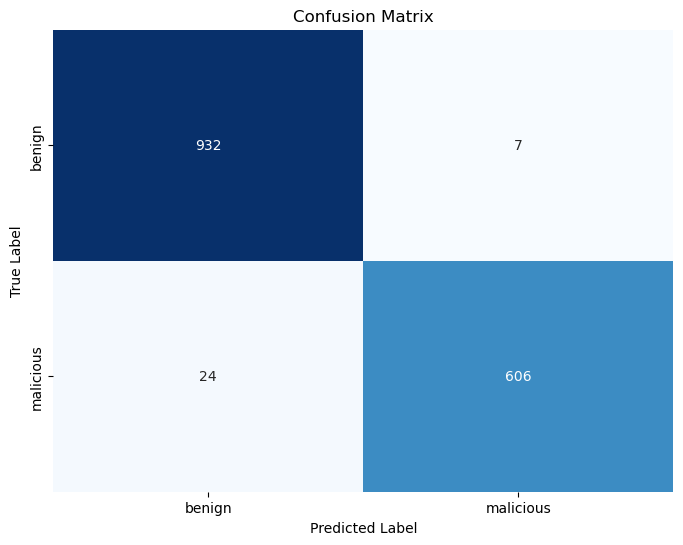

In [2]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Membuat Confusion Matrix
conf_matrix = confusion_matrix(y_Test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,\
            xticklabels=label_encoder_y.classes_, yticklabels=label_encoder_y.classes_)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()